<a href="https://colab.research.google.com/github/sjdnsjd919/FinancialAI-SentimentAnalysis/blob/main/FinancialSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from pprint import pprint
import logging
import matplotlib
import seaborn as sns
!pip install yfinance --upgrade --no-cache-dir

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/CityU Project/Code|finals/t5/stockerbotModified2.csv',header=0)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,text,timestamp,source,symbols,company_names,url,verified,Unnamed: 8
0,1016082850326640000,The robot homie R2-D2 told me to buy sell and ...,Sun Jul 08 22:13:24 +0000 2018,StockTipRobot,FIS,Fidelity National Information Services,NaN,FALSE,NaN
1,1016085297661120000,Arthur J Gallagher &amp; Co $AJG vs. Marsh &am...,Sun Jul 08 22:23:07 +0000 2018,ConsumerFeed,AJG,Arthur J. Gallagher & Co.,http://zpr.io/6Tnx3,FALSE,NaN
2,1016086242583350000,Arthur J Gallagher &amp; Co $AJG vs. Marsh &am...,Sun Jul 08 22:26:52 +0000 2018,MareaInformativ,AJG,Arthur J. Gallagher & Co.,http://www.mareainformativa.com/?p=407083,FALSE,NaN
3,1016088038634590000,$INFO $C Asia Stocks Signal Gains; Dollar Weak...,Sun Jul 08 22:34:01 +0000 2018,finzine,INFO,IHS Markit Ltd.,http://www.hvper.com/?ref=ftw,FALSE,NaN
4,1016090469292560000,RT @dailypoliticaln: Fluor Co. $NEW $FLR Stock...,Sun Jul 08 22:43:40 +0000 2018,Riskographer2,FLR,Fluor Corporation,http://www.dailypolitical.com/?p=2188895,FALSE,NaN


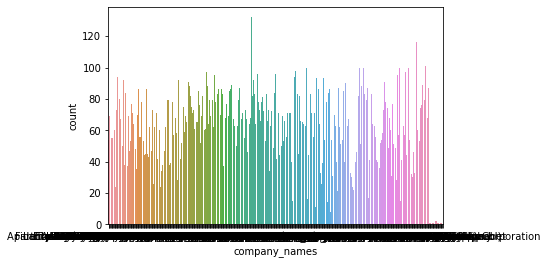

In [6]:
sns.countplot(data=df,x='company_names')

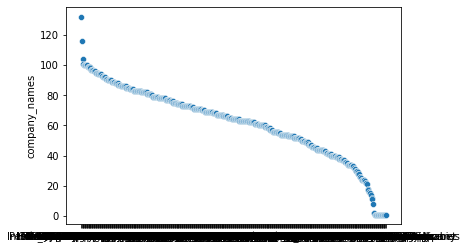

In [7]:
sns.scatterplot(data=df['company_names'].value_counts())

In [9]:
df['company_names'].value_counts().keys()

Index(['Twenty-First Century Fox', 'Alphabet Inc.', 'Discovery', 'Netflix',
       'Momo Inc.', 'Eversource Energy', 'Applied Materials', 'The Gap',
       'M&T Bank Corporation', 'Honeywell International Inc.',
       ...
       'Amazon*The Gap', 'Oracle', 'Time Warner', 'Intel*U.S.', 'Harris',
       'Facebook*Alphabet*Alphabet', 'American', 'Macy's', 'The Goldman Sachs',
       'Twitter'],
      dtype='object', length=461)

In [10]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4a15e8e0507453ec63e6958164d206ad02db92e5c3ed1c0682879b5beb8bbfc5
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = df["text"]
sentence_embeddings = model.encode(sentences)
print(sentence_embeddings[0])

In [ ]:
sentence_embeddings
np.save("sentence_embeddings.csv",sentence_embeddings)
SE2 = np.copy(sentence_embeddings)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(SE2)


In [ ]:
text = ["BenZac rises by 10%"]
text2 = model.encode(text)
kmeans.predict(text2)